In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframes
#pd.pandas.set_option("display.max_columns", None)

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# see the shape of dataset with rows and coloumns
dataset.shape

(1460, 81)

## In Data analysis we will analyze to find the below staff
- 1. Missing Values
- 2. All the numerical variables
- 3. Distrubution of the numerical variables
- 4. Categorical Variables
- 5. Ooutliers
- 6. Relationship between independent and dependent features
- 7. Correlations

# 1. Missing Values

In [5]:
dataset.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [6]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# finding the features with nan values
features_with_na_values = [features for features in dataset.columns if dataset[features].isnull().sum() >= 1]

In [8]:
# these are the features with nan values 
features_with_na_values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
# calculate the missing value percentage of each nan value colums
[(feature, np.round(dataset[feature].isnull().sum()/dataset.shape[0] * 100, 4)) for feature in features_with_na_values]

[('LotFrontage', 17.7397),
 ('Alley', 93.7671),
 ('MasVnrType', 59.726),
 ('MasVnrArea', 0.5479),
 ('BsmtQual', 2.5342),
 ('BsmtCond', 2.5342),
 ('BsmtExposure', 2.6027),
 ('BsmtFinType1', 2.5342),
 ('BsmtFinType2', 2.6027),
 ('Electrical', 0.0685),
 ('FireplaceQu', 47.2603),
 ('GarageType', 5.5479),
 ('GarageYrBlt', 5.5479),
 ('GarageFinish', 5.5479),
 ('GarageQual', 5.5479),
 ('GarageCond', 5.5479),
 ('PoolQC', 99.5205),
 ('Fence', 80.7534),
 ('MiscFeature', 96.3014)]

<Axes: >

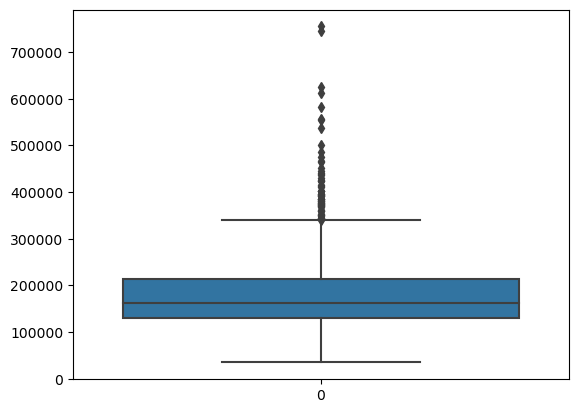

In [10]:
sns.boxplot(dataset['SalePrice'])

In [11]:
# calculate the missing value percentage of each nan value colums
for feature in features_with_na_values:
    print(feature, np.round(dataset[feature].isnull().mean() * 100, 4), "% missing values")

LotFrontage 17.7397 % missing values
Alley 93.7671 % missing values
MasVnrType 59.726 % missing values
MasVnrArea 0.5479 % missing values
BsmtQual 2.5342 % missing values
BsmtCond 2.5342 % missing values
BsmtExposure 2.6027 % missing values
BsmtFinType1 2.5342 % missing values
BsmtFinType2 2.6027 % missing values
Electrical 0.0685 % missing values
FireplaceQu 47.2603 % missing values
GarageType 5.5479 % missing values
GarageYrBlt 5.5479 % missing values
GarageFinish 5.5479 % missing values
GarageQual 5.5479 % missing values
GarageCond 5.5479 % missing values
PoolQC 99.5205 % missing values
Fence 80.7534 % missing values
MiscFeature 96.3014 % missing values


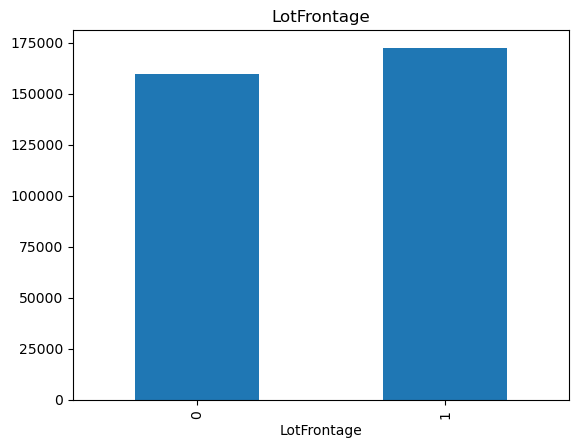

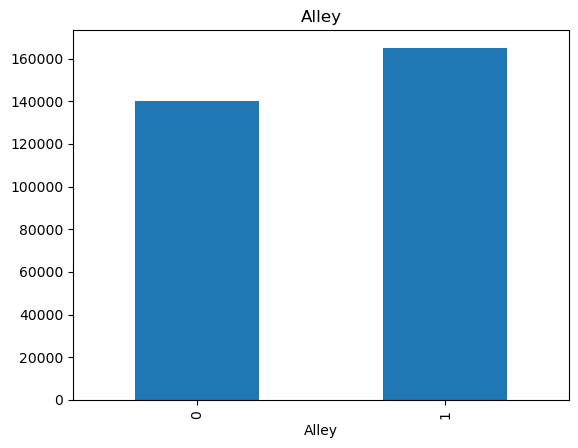

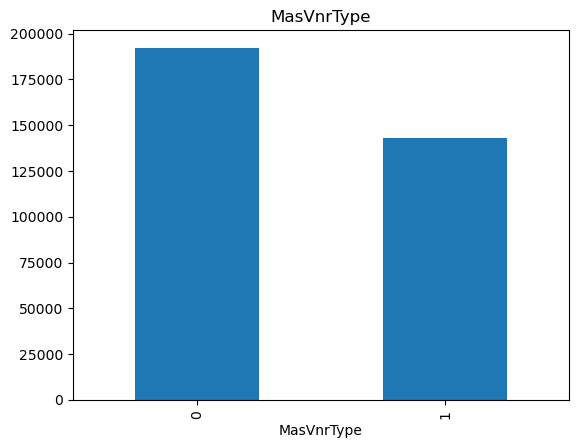

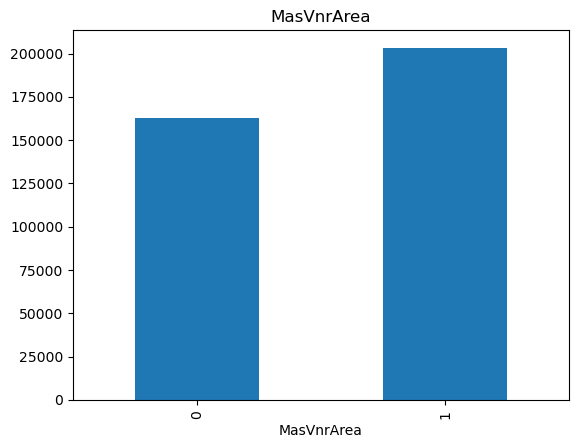

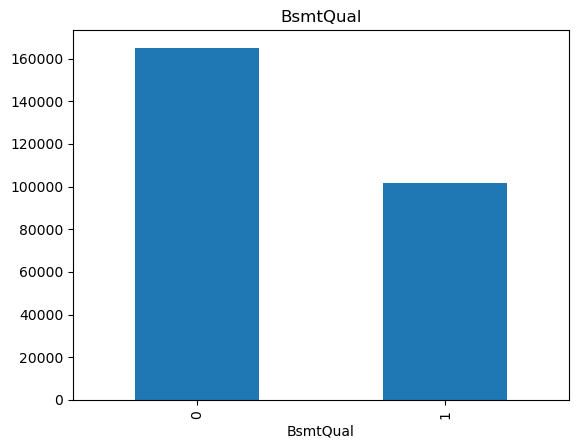

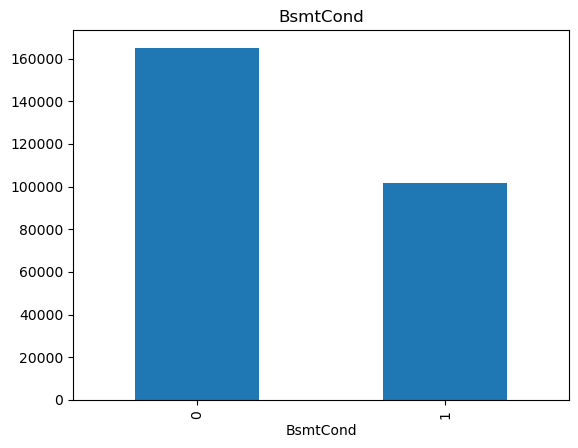

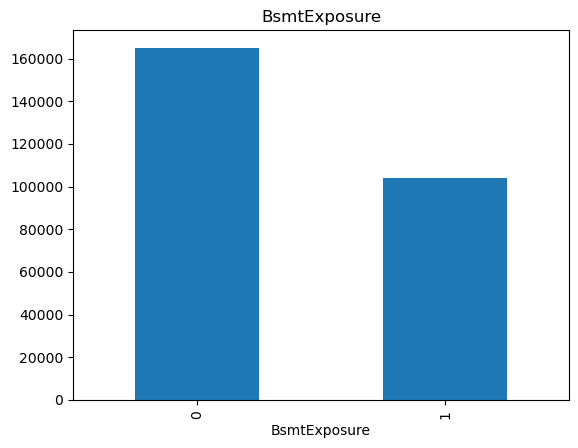

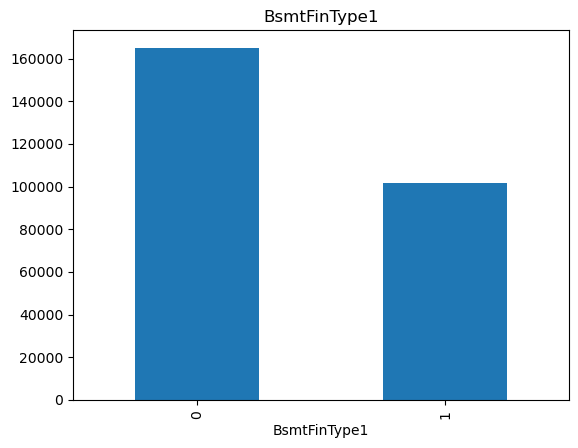

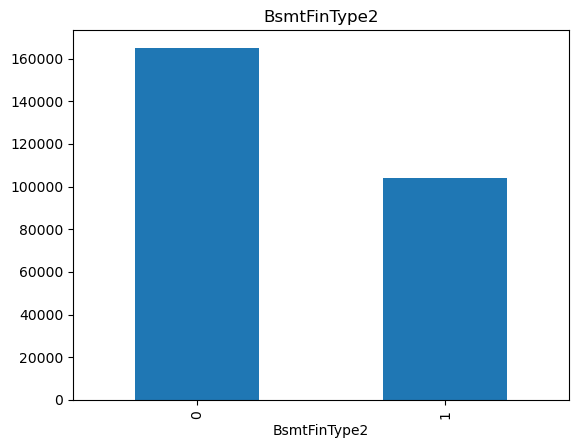

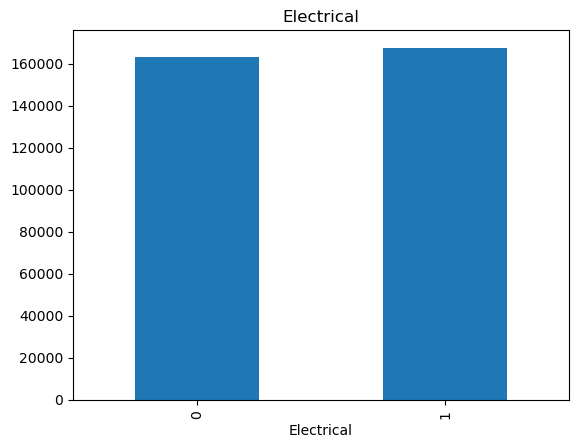

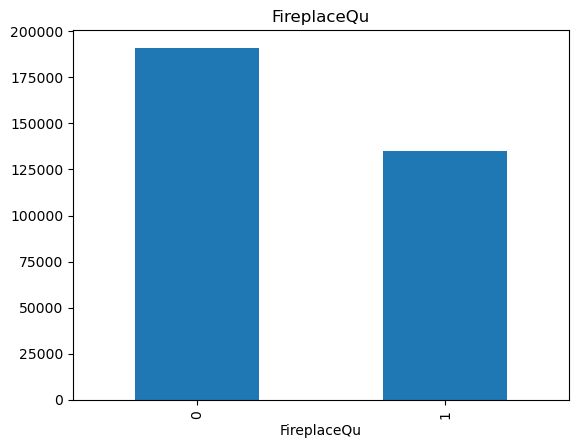

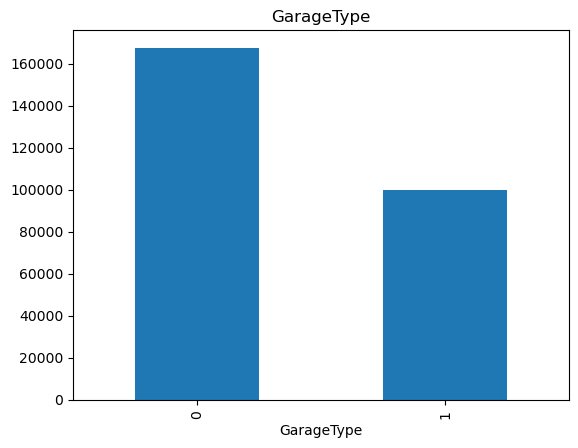

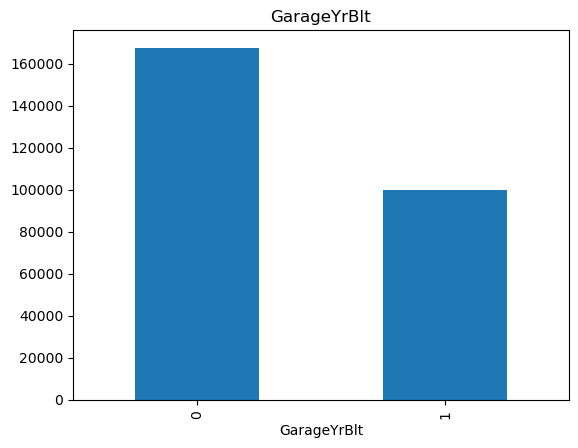

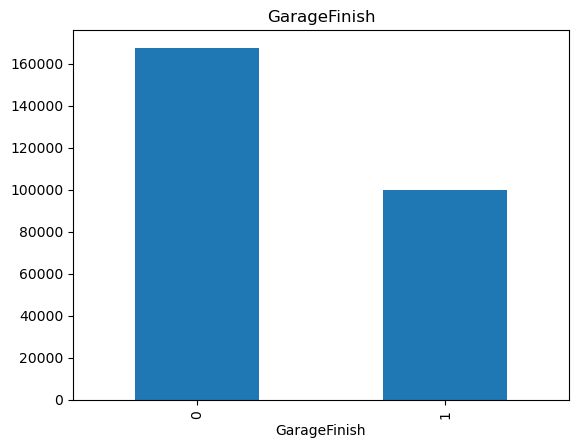

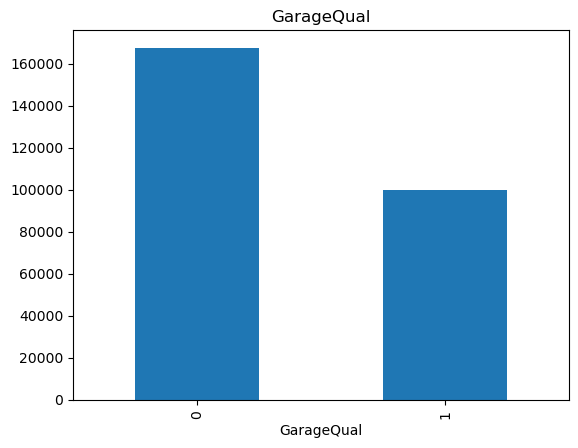

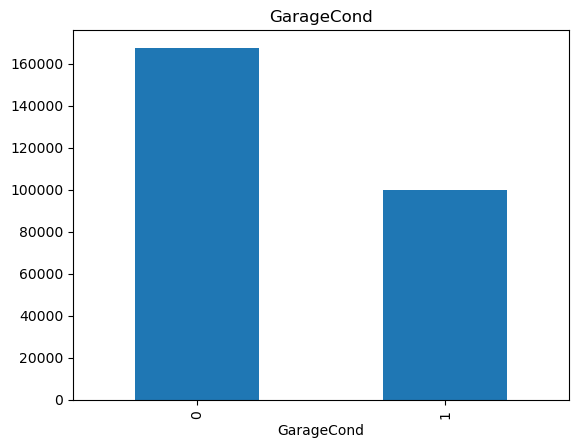

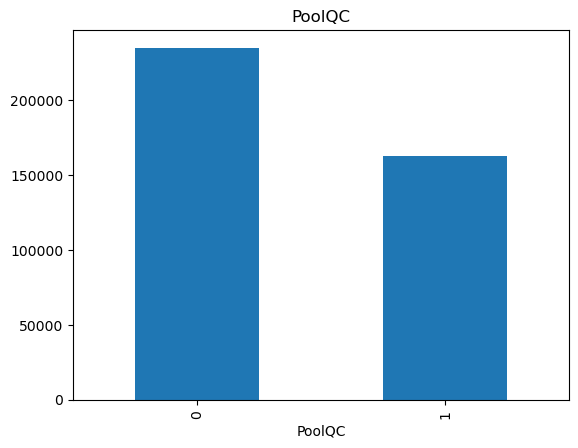

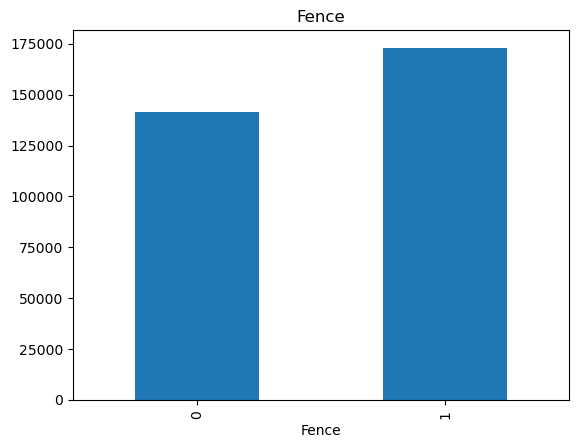

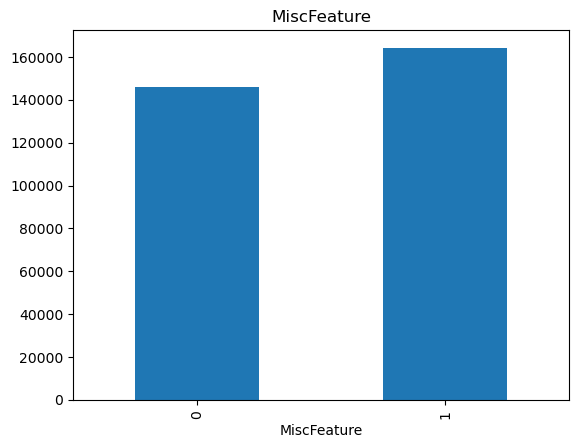

In [12]:
#Independet VS Dependent features
##to handle missing values we will analyze the relationship between Independet VS Dependent features by
#drawing some graphs

## Lets plot some mazing diagrams
data = dataset.copy()

for feature in features_with_na_values:
    #lets make a variable that indiacte 1 if the observatuion was missing or 0 otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    #lets calculate the mean saleprice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here With the relation between he missing values and the dependent variable is clearly visible. So We need to replace these nan values with something meaningful which we will do in the Feature Engineering Section

### Numerical variables

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
## list of numerical values
dataset['SaleType'].dtypes != 'object'

False

In [15]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'object']

In [16]:
print(len(numerical_features))
dataset[numerical_features].head()

38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
print(numerical_features)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [18]:
## Temporal Variables
year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [19]:
[[feature, dataset[feature].unique()] for feature in year_features]

[['YearBuilt',
  array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
         2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
         2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
         1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
         1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
         1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
         1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
         1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
         1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
         1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
         1872, 1905], dtype=int64)],
 ['YearRemodAdd',
  array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
         1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
         1983, 1980, 1966, 196

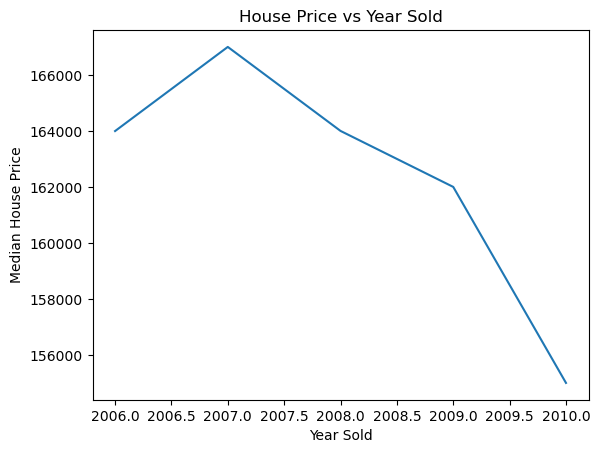

In [20]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Median House Price")
plt.title("House Price vs Year Sold")
plt.show()

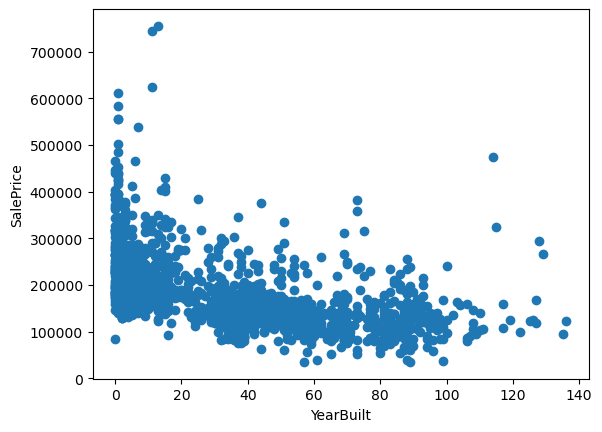

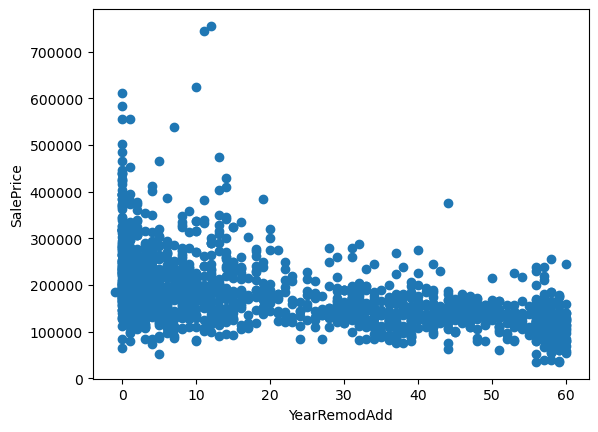

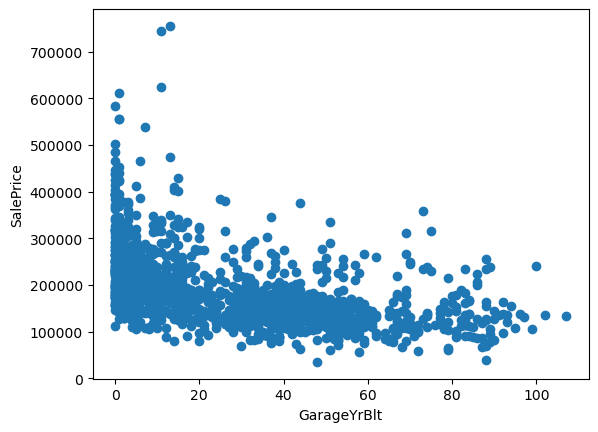

In [21]:
### here we will compare the diffrence between all years features with saleprice
data = dataset.copy()
for feature in year_features:
    if feature != 'YrSold':
        data[feature] = data['YrSold'] - data[feature]
        
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

###### observation
- within all the years wise information, it is clearly visible that the New houses are more costlier than the older one. 
- Looks like a pareto or power law distribution.

In [22]:
## numerical variables - 2 Types
## 1. Continuos variable and Discreate variable

discreate_features = [feature for feature in numerical_features if len(dataset[feature].unique()) <= 25]
print(len(discreate_features))

18


In [23]:
dataset[discreate_features]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8,2007
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2,2010
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5,2010
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4,2010


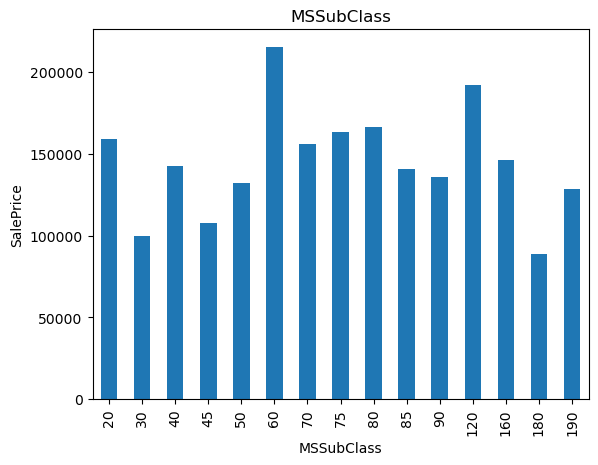

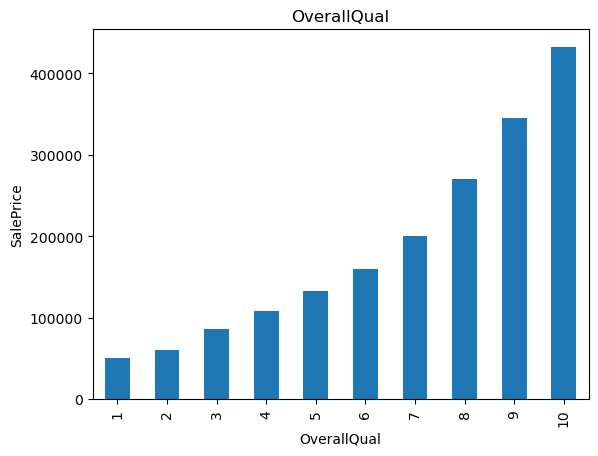

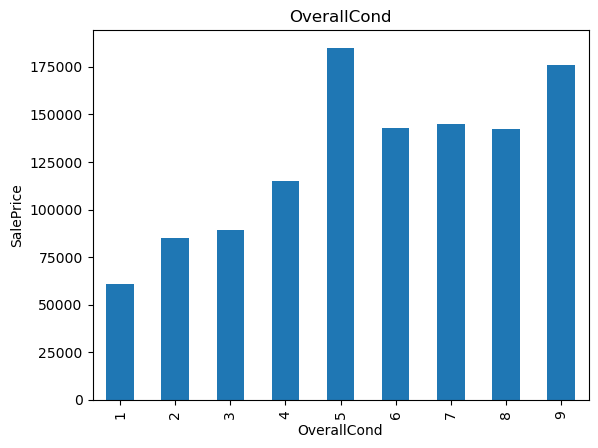

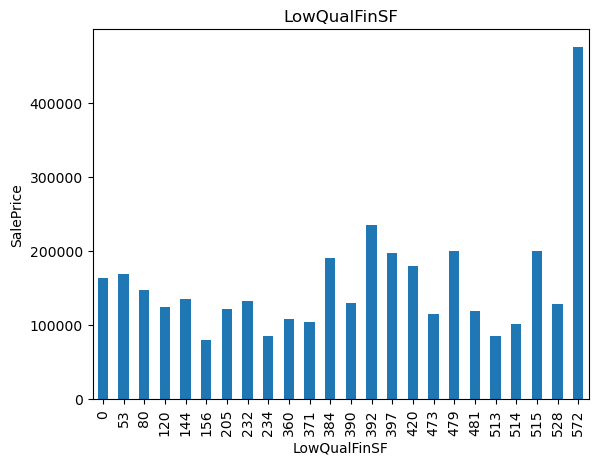

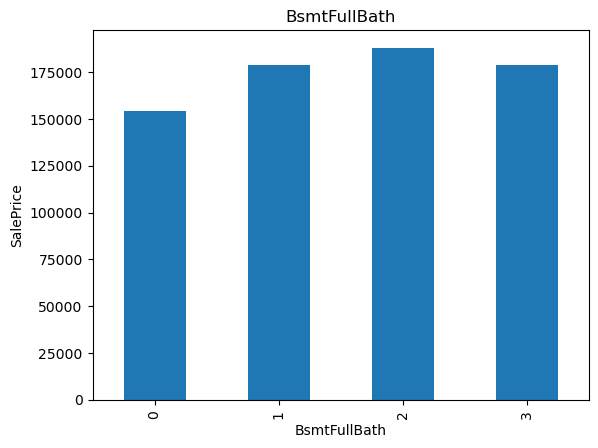

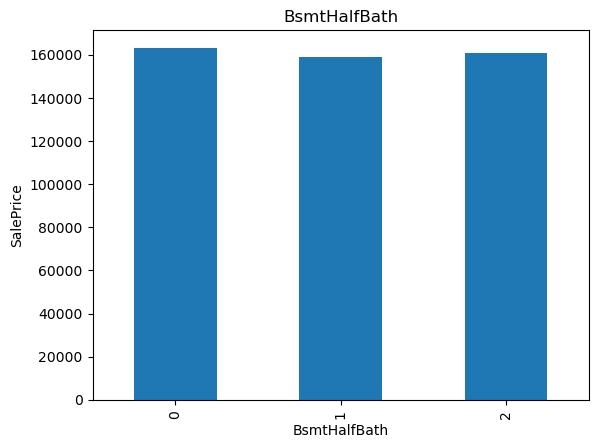

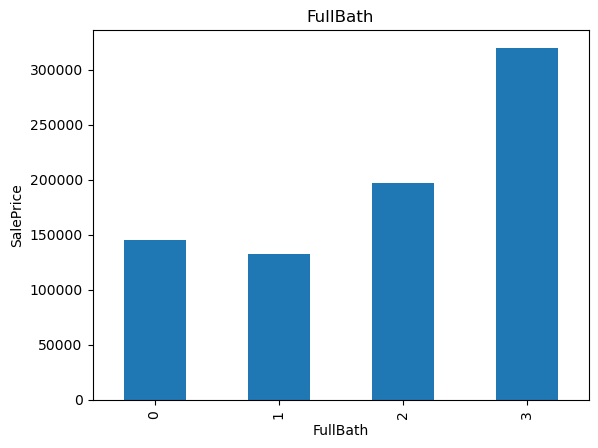

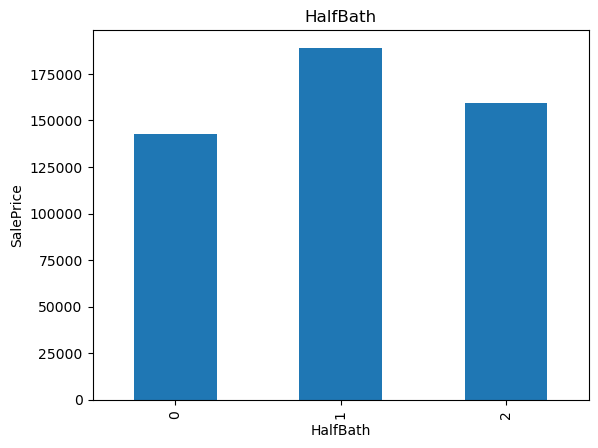

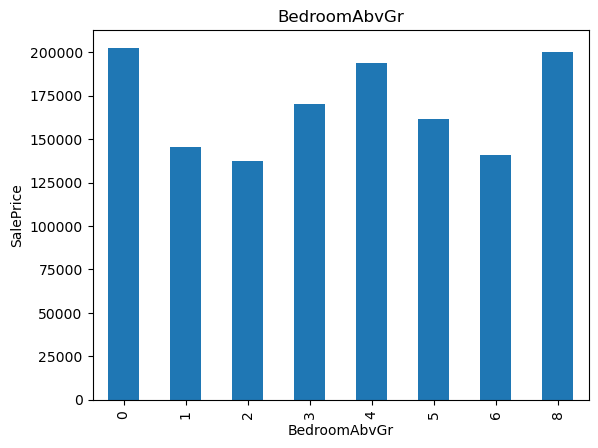

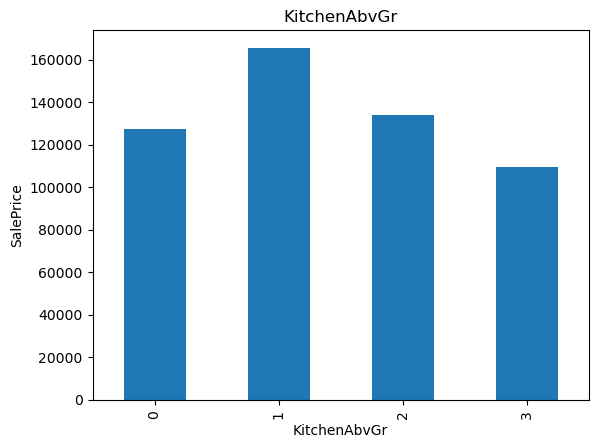

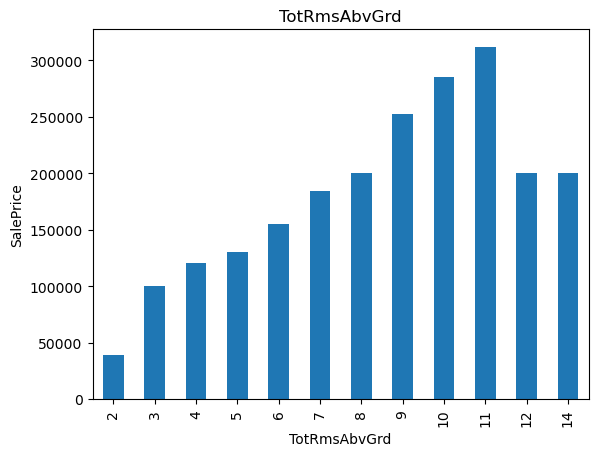

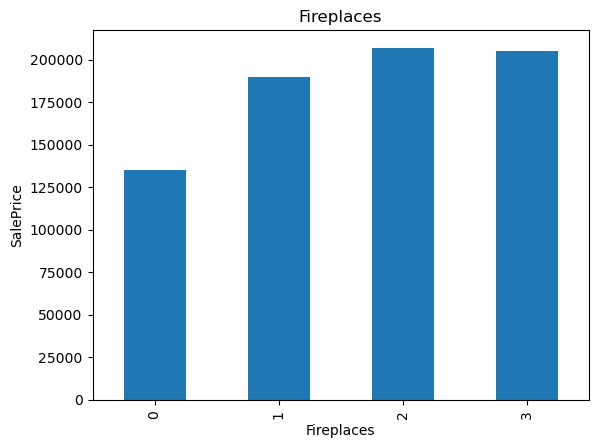

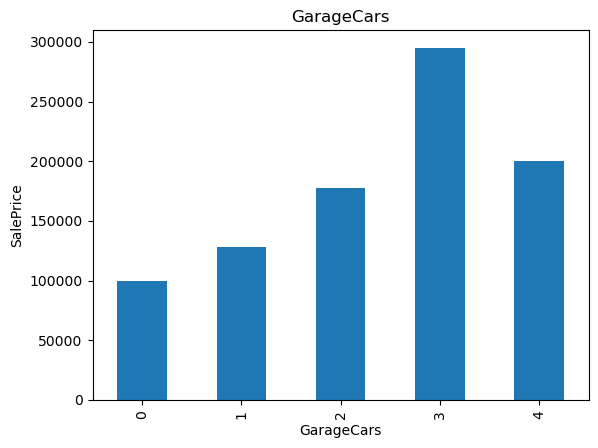

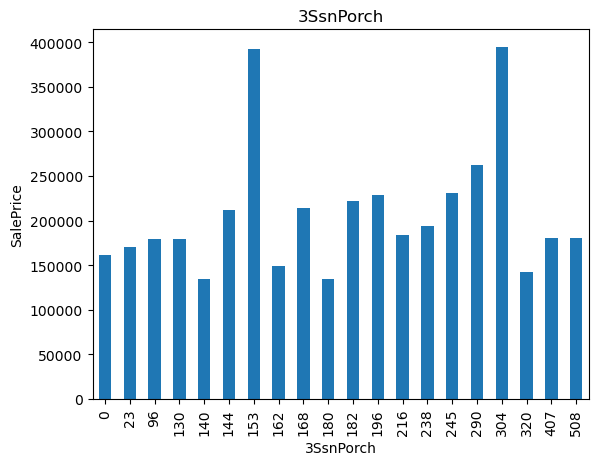

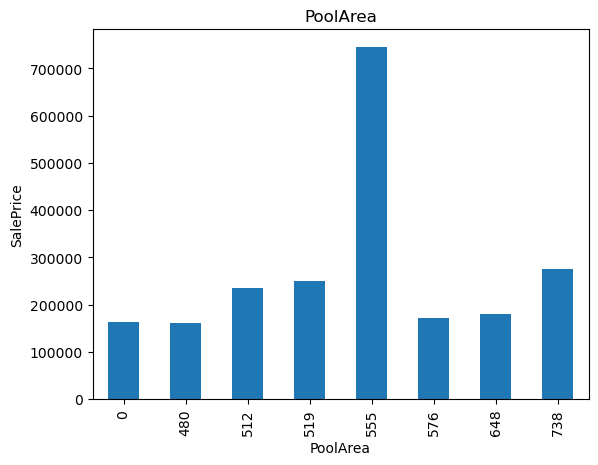

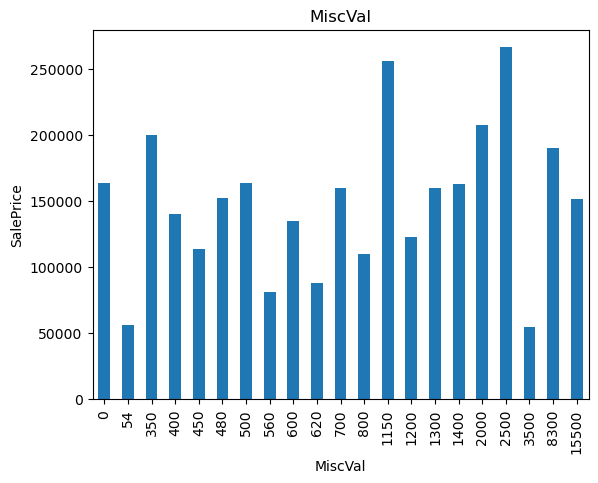

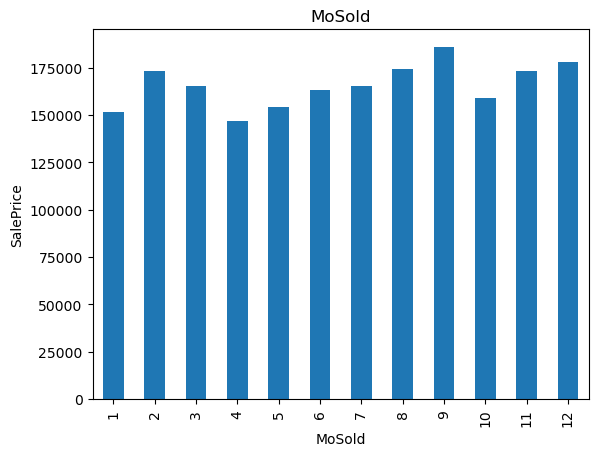

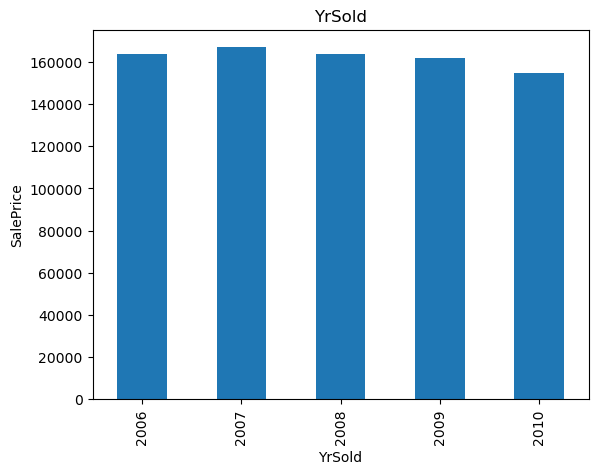

In [24]:
## Lets find the relationship between Discreate and Sale Price
data = data.copy()
for feature in discreate_features:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

In [25]:
## There is a relationship between Discrate features and SalePrice

In [26]:
## Continuous Variable
continuous_features = [feature for feature in numerical_features if feature not in discreate_features + year_features]
print(len(continuous_features))

17


In [27]:
dataset[continuous_features]

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,0,0,953,953,953,694,1647,460,0,40,0,0,175000
1456,1457,85.0,13175,119.0,790,163,589,1542,2073,0,2073,500,349,0,0,0,210000
1457,1458,66.0,9042,0.0,275,0,877,1152,1188,1152,2340,252,0,60,0,0,266500
1458,1459,68.0,9717,0.0,49,1029,0,1078,1078,0,1078,240,366,0,112,0,142125


In [28]:
dataset[continuous_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  GarageArea     1460 non-null   int64  
 12  WoodDeckSF     1460 non-null   int64  
 13  OpenPorchSF    1460 non-null   int64  
 14  EnclosedPorch  1460 non-null   int64  
 15  ScreenPorch    1460 non-null   int64  
 16  SalePrice      1460 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 194.0 KB


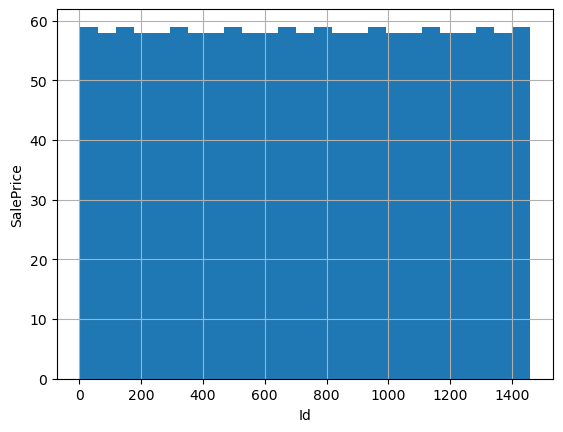

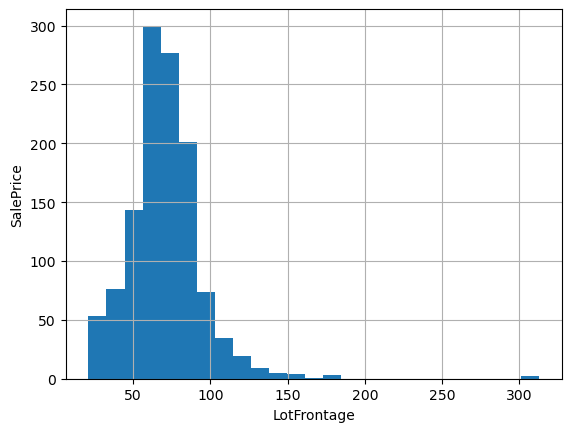

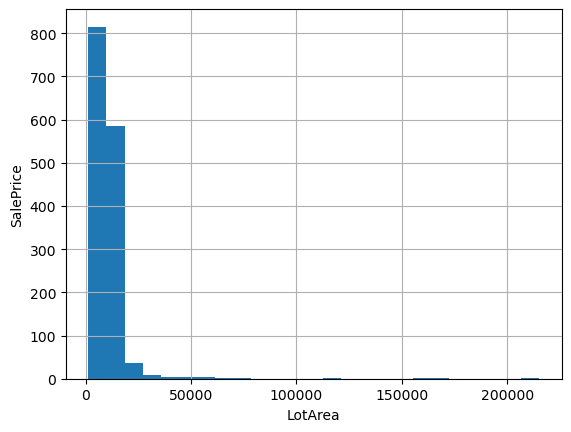

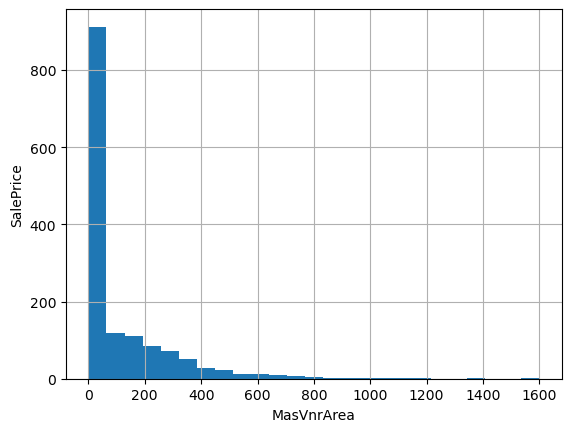

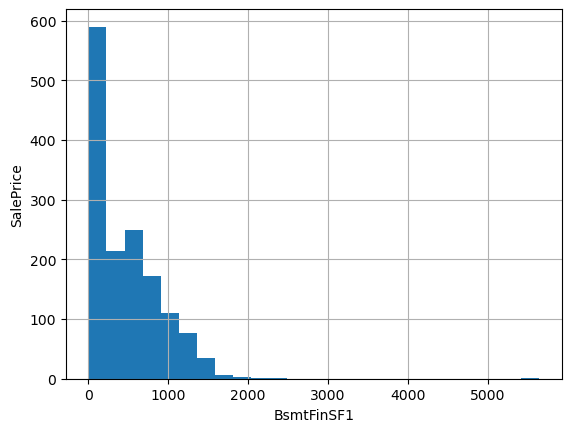

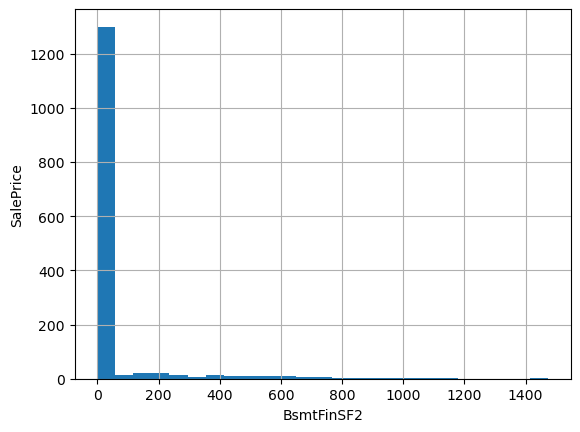

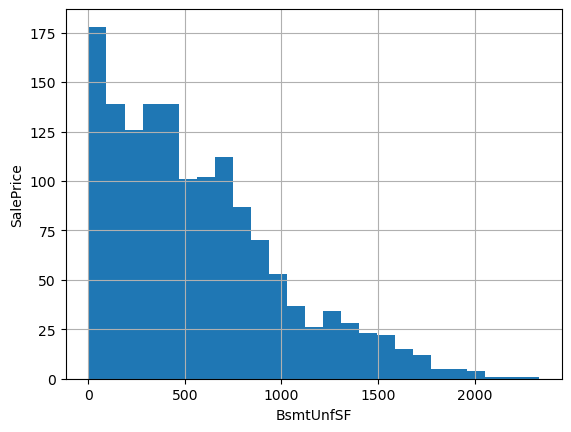

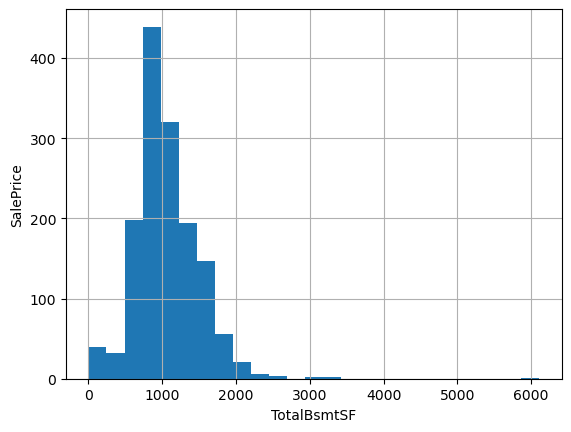

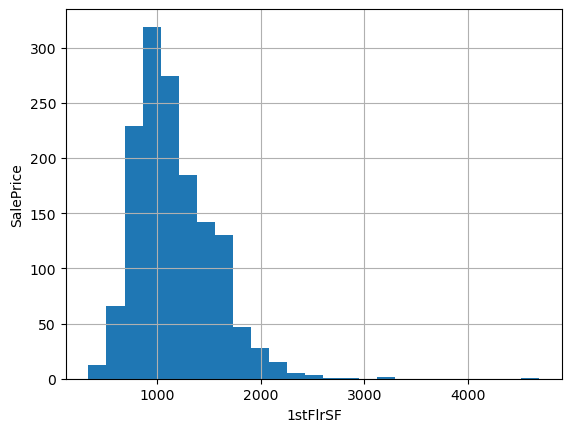

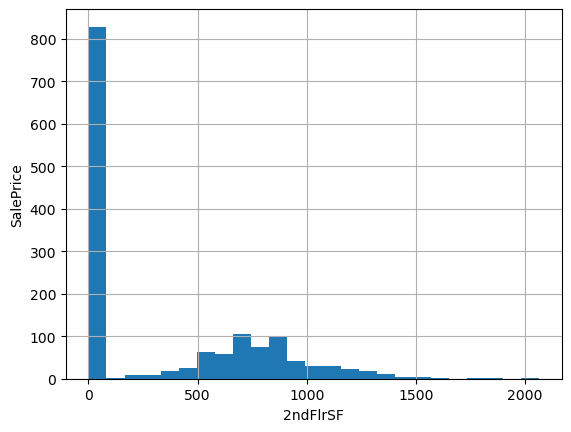

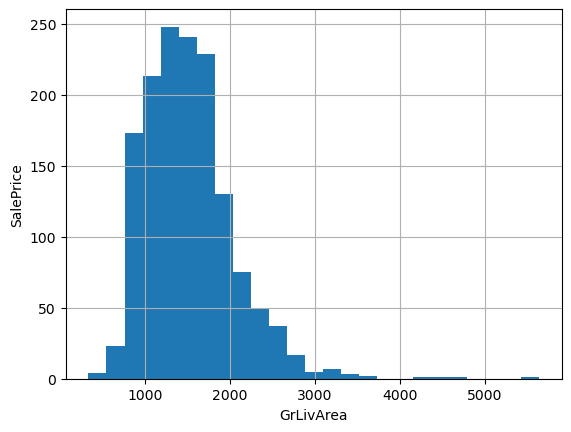

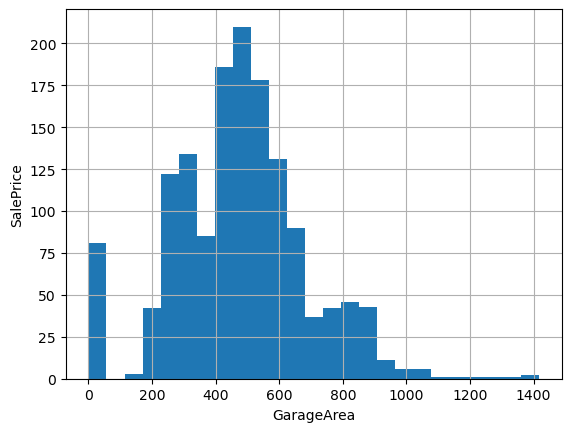

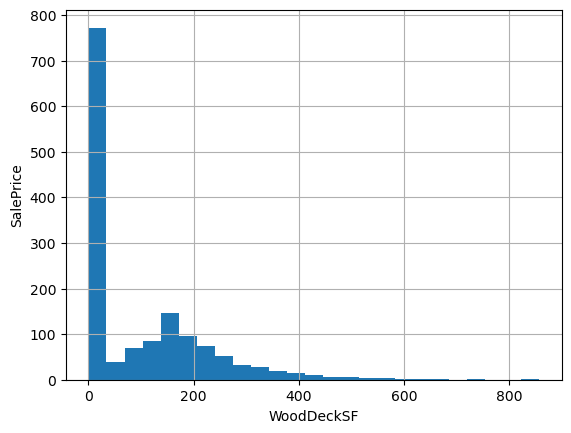

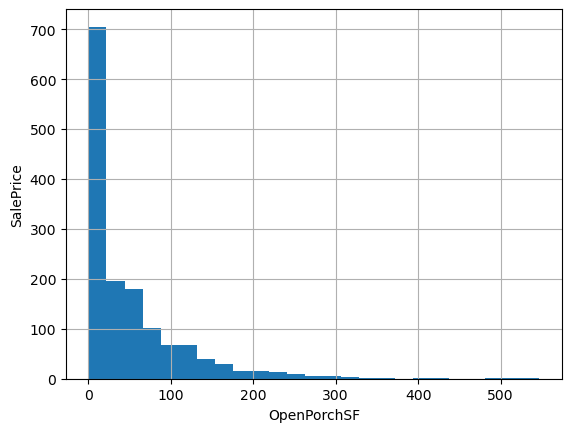

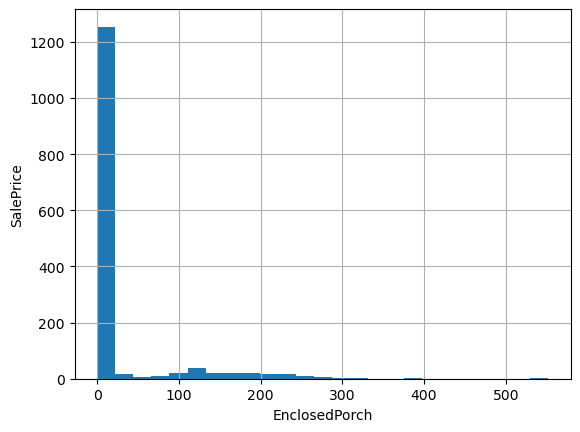

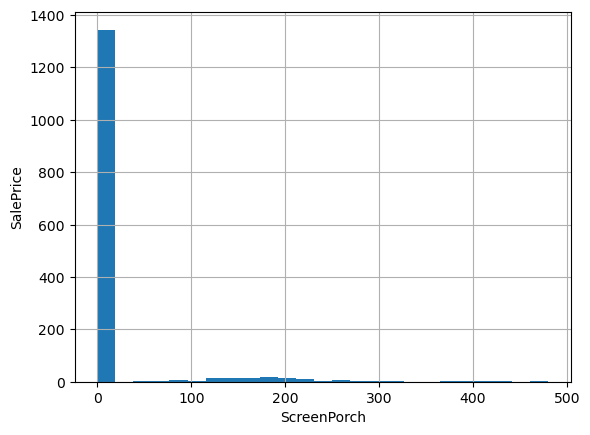

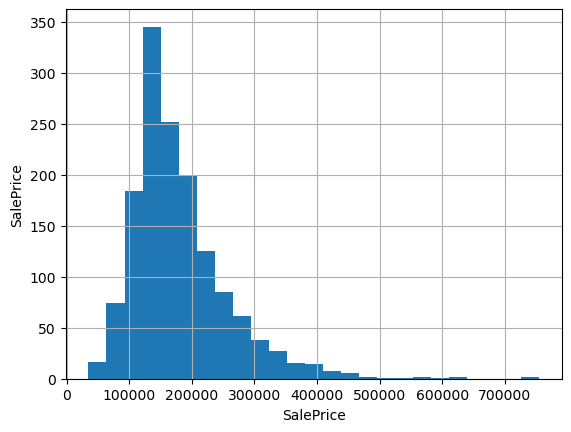

In [29]:
### lets analyze the continuous values by creating histogram to understand the distribution
data = data.copy()
for feature in continuous_features:
    #data.groupby(feature)['SalePrice'].median().plot.hist()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

#### EDA Part 2

we will be using logorithmic transformation

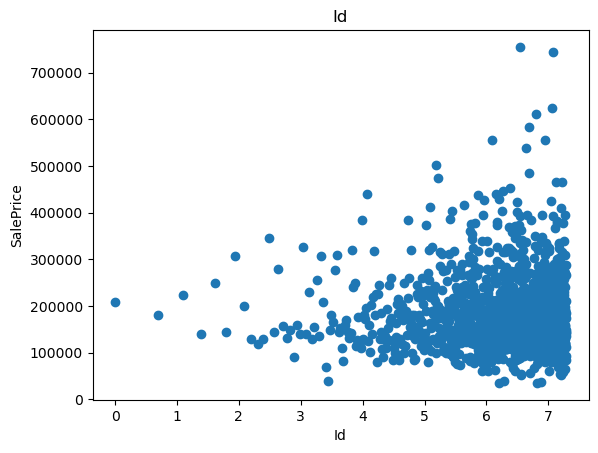

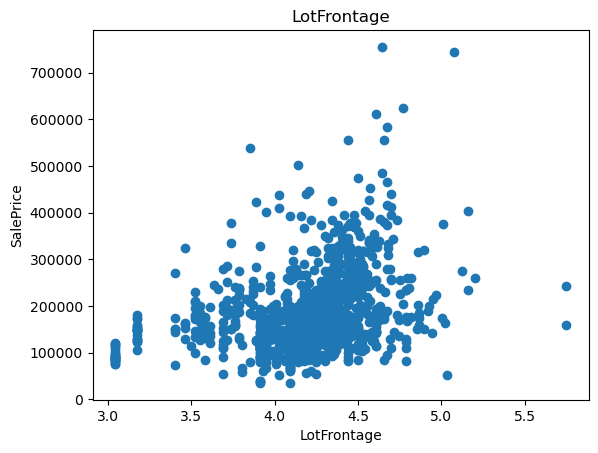

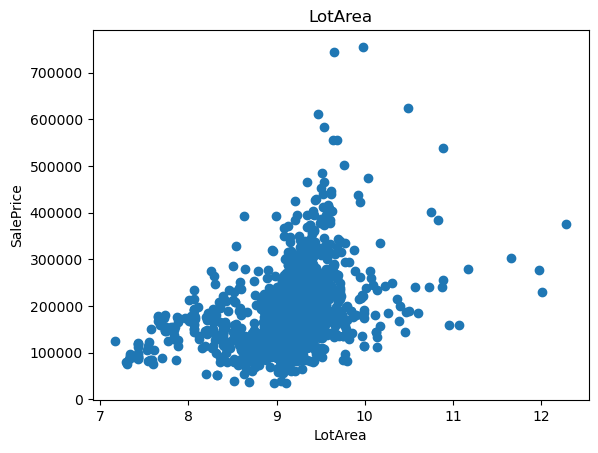

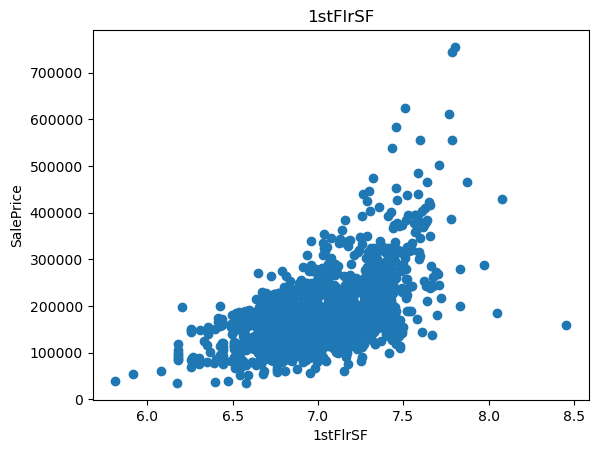

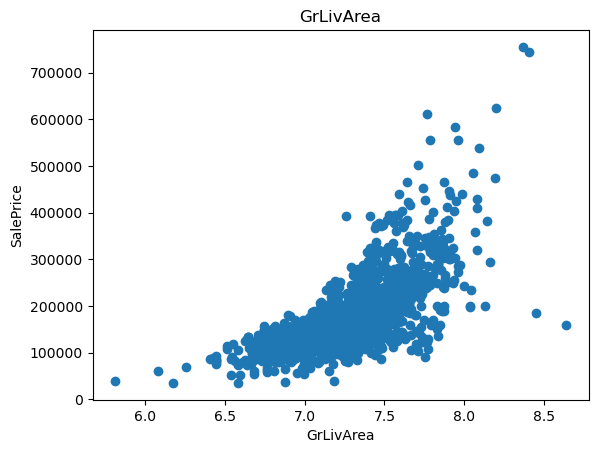

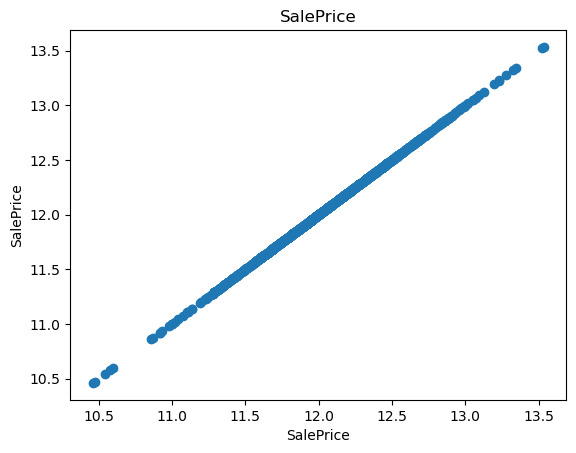

In [30]:
data = dataset.copy()
for feature in continuous_features:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

### Outliers

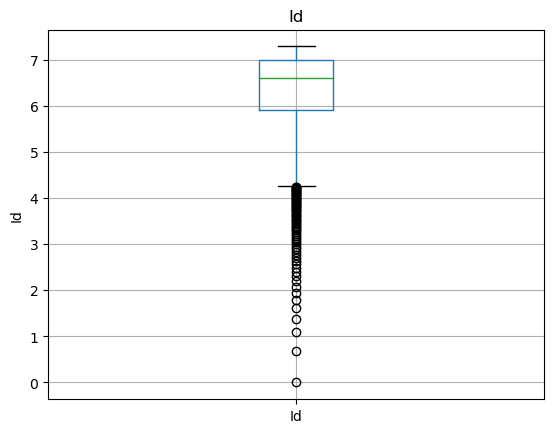

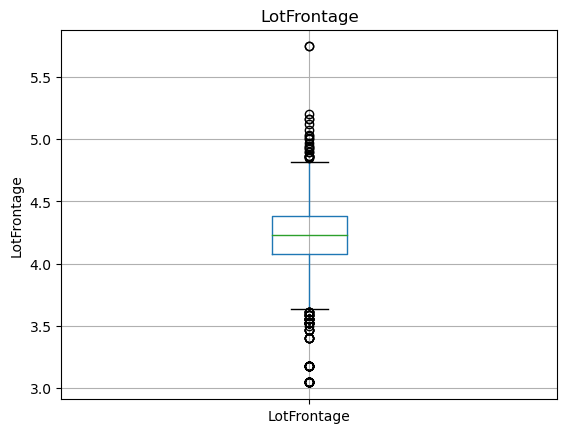

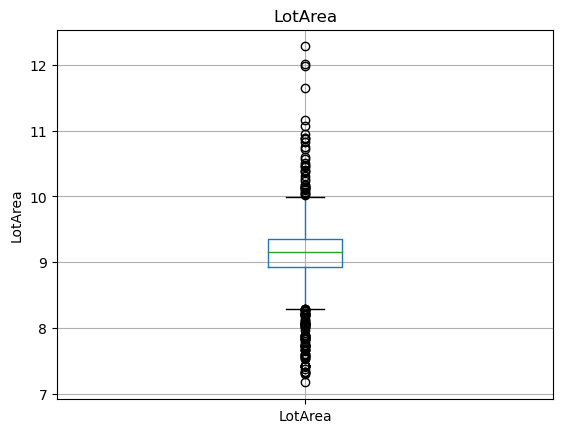

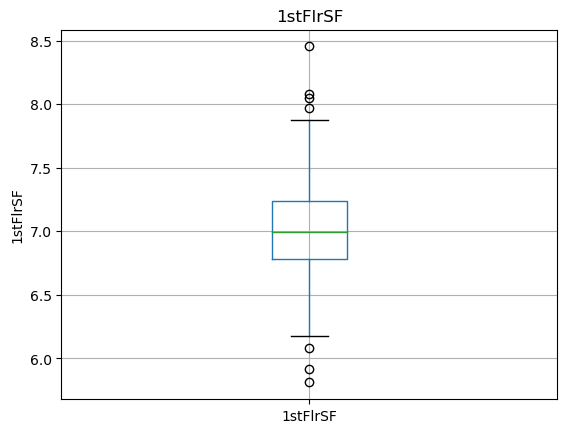

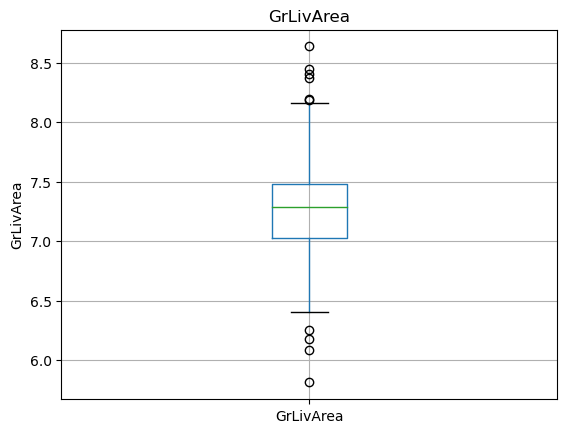

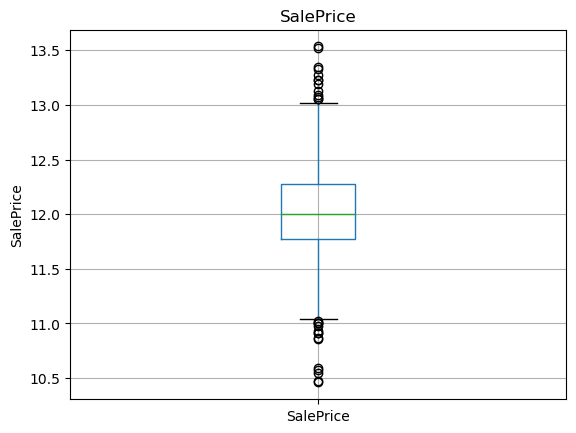

In [31]:
data = dataset.copy()
for feature in continuous_features:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

<Axes: >

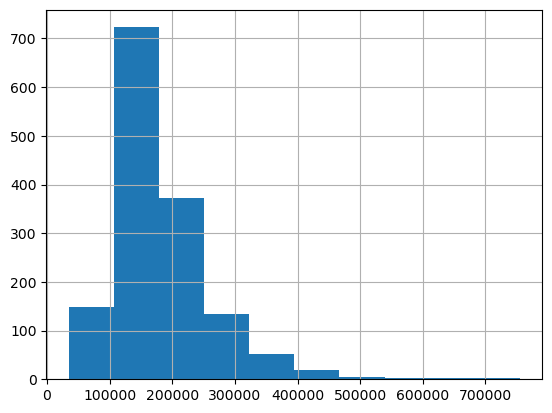

In [32]:
dataset["SalePrice"].hist()

<Axes: xlabel='SalePrice', ylabel='Count'>

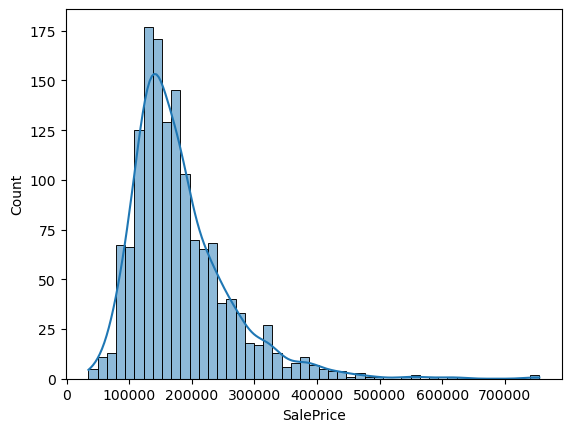

In [33]:
sns.histplot(dataset["SalePrice"], kde = True)

## Categorical Variables

In [34]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [35]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [36]:
for feature in categorical_features:
    print(f"The feature name is {feature} and the number of categories are {len(dataset[feature].unique())}")

The feature name is MSZoning and the number of categories are 5
The feature name is Street and the number of categories are 2
The feature name is Alley and the number of categories are 3
The feature name is LotShape and the number of categories are 4
The feature name is LandContour and the number of categories are 4
The feature name is Utilities and the number of categories are 2
The feature name is LotConfig and the number of categories are 5
The feature name is LandSlope and the number of categories are 3
The feature name is Neighborhood and the number of categories are 25
The feature name is Condition1 and the number of categories are 9
The feature name is Condition2 and the number of categories are 8
The feature name is BldgType and the number of categories are 5
The feature name is HouseStyle and the number of categories are 8
The feature name is RoofStyle and the number of categories are 6
The feature name is RoofMatl and the number of categories are 8
The feature name is Exterio

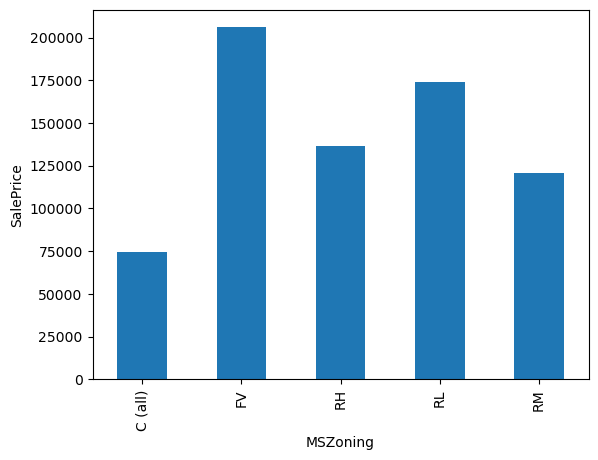

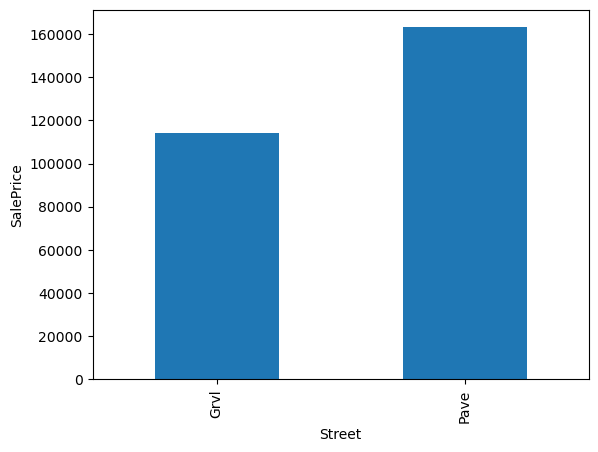

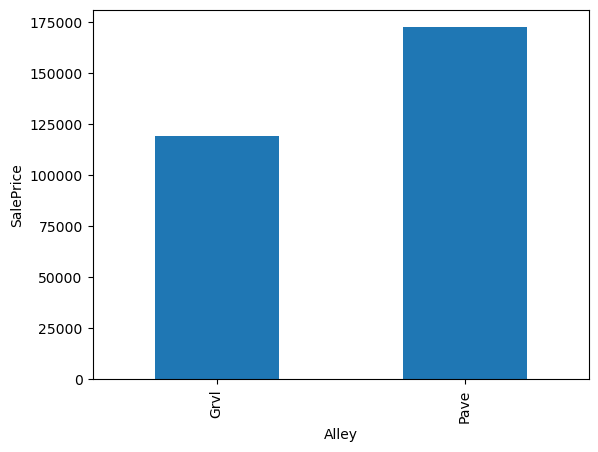

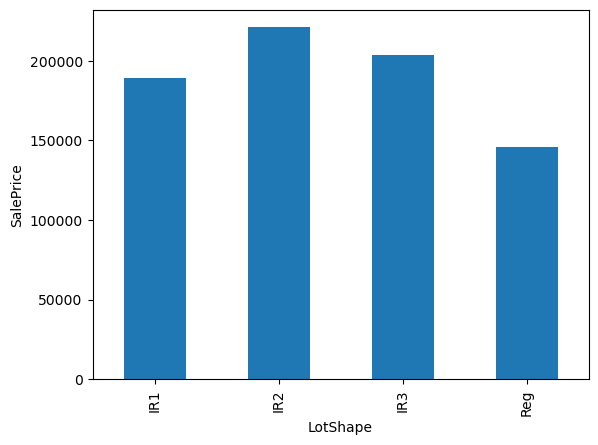

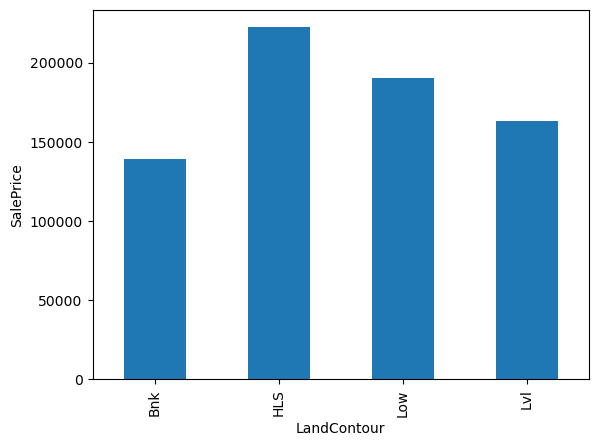

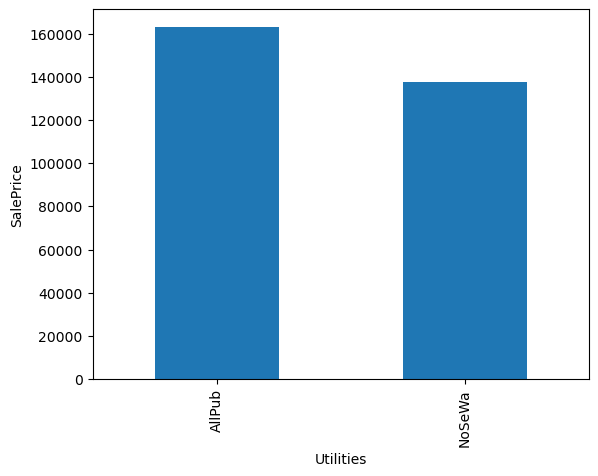

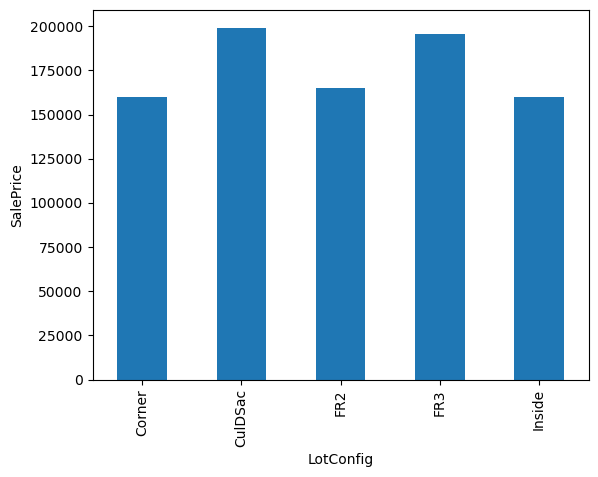

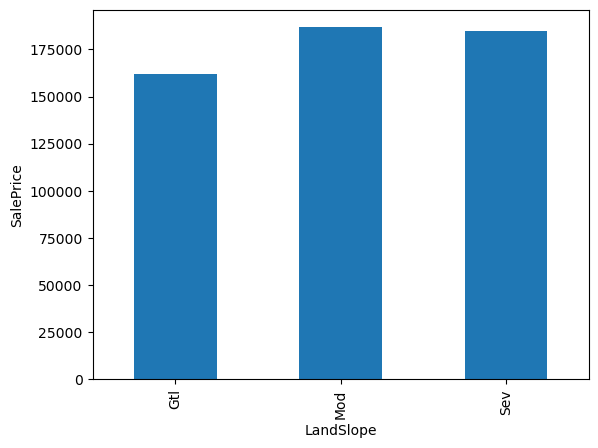

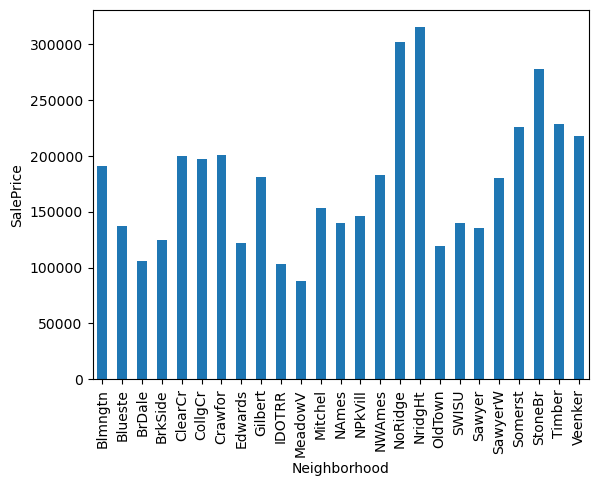

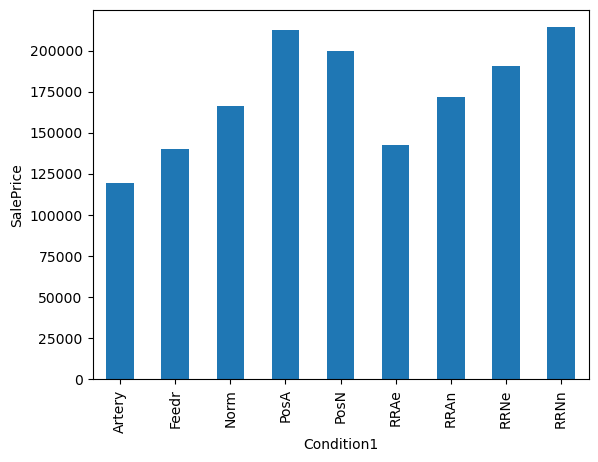

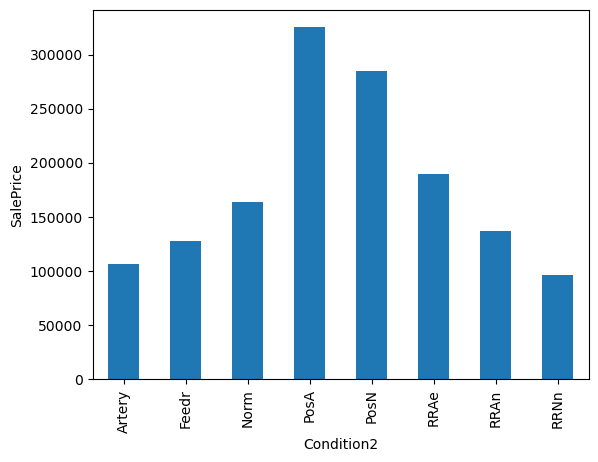

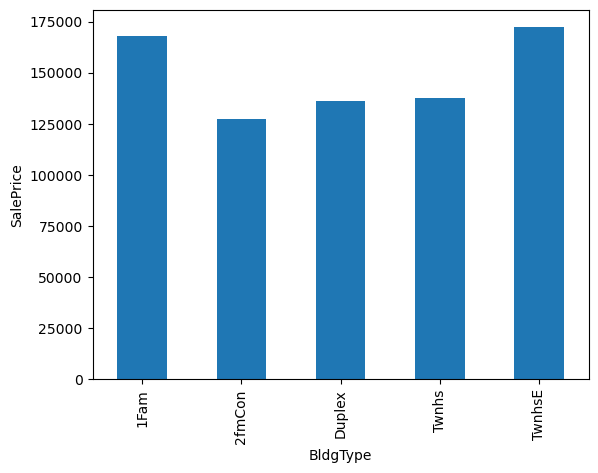

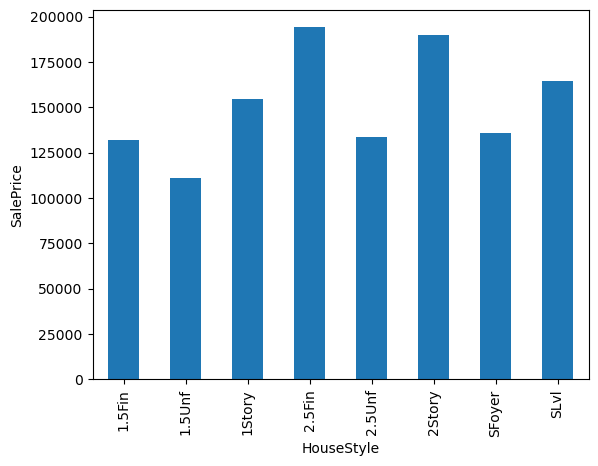

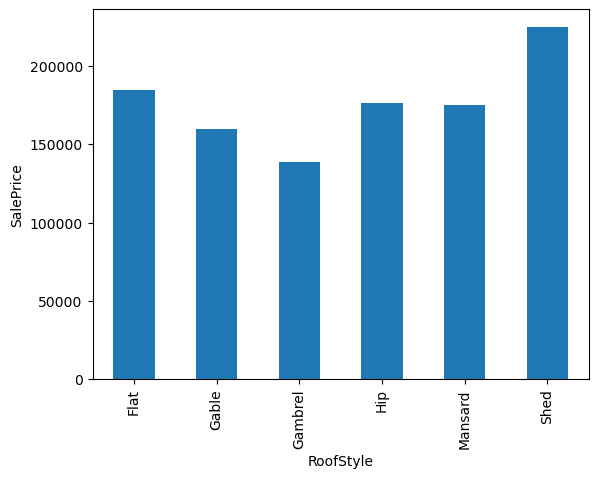

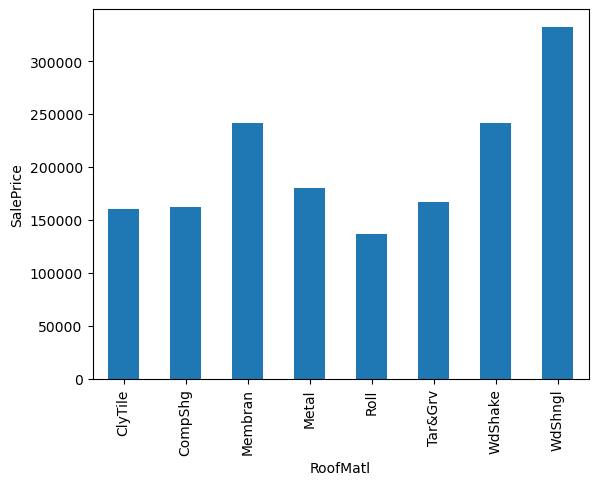

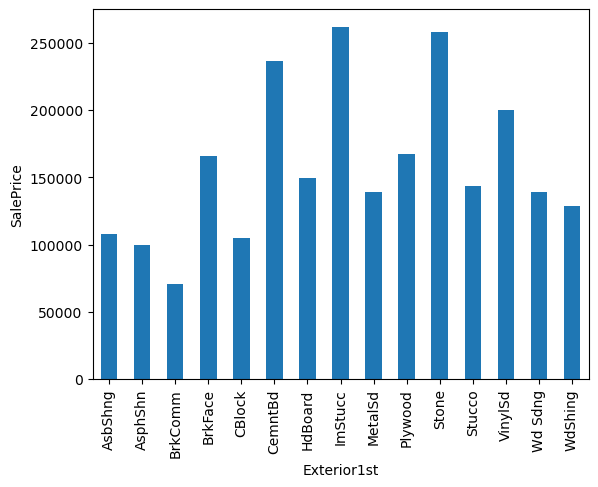

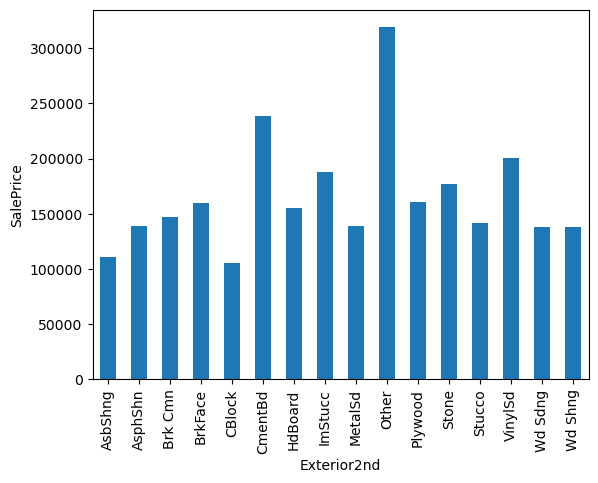

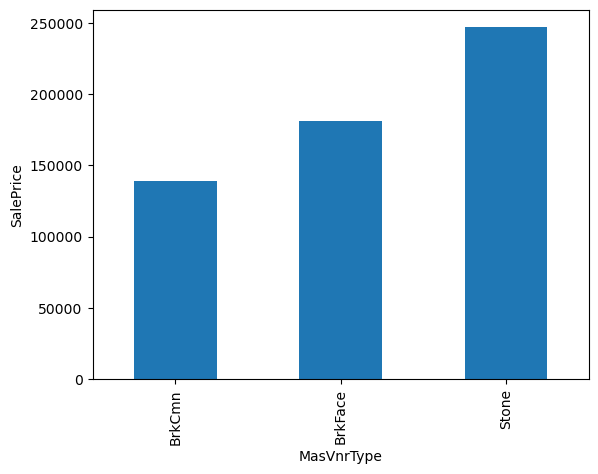

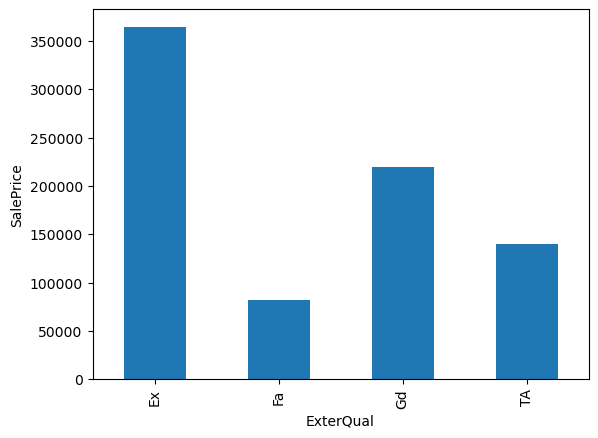

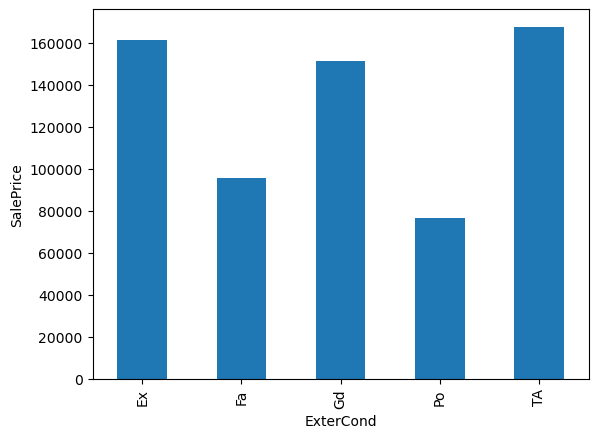

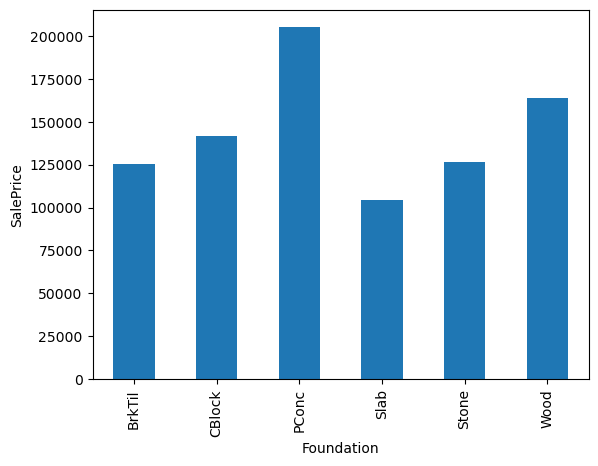

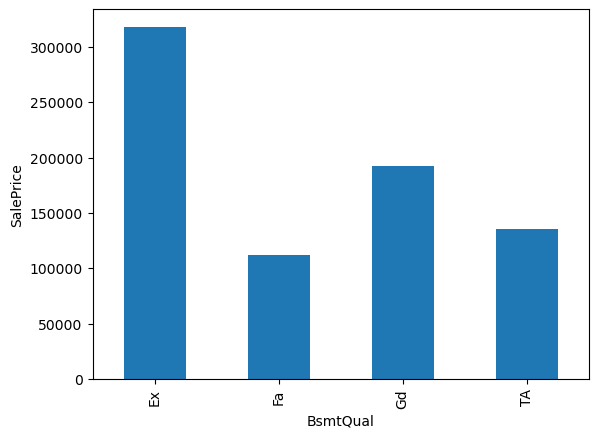

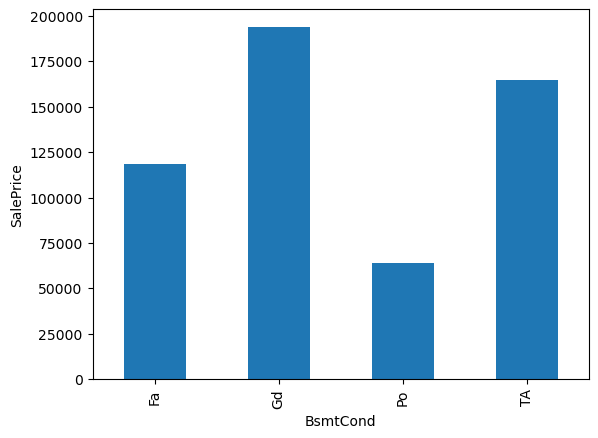

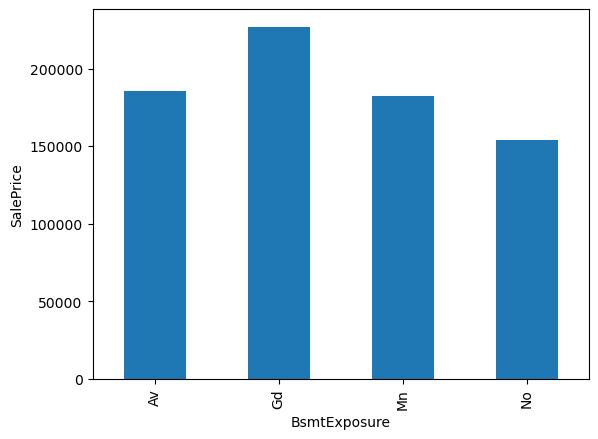

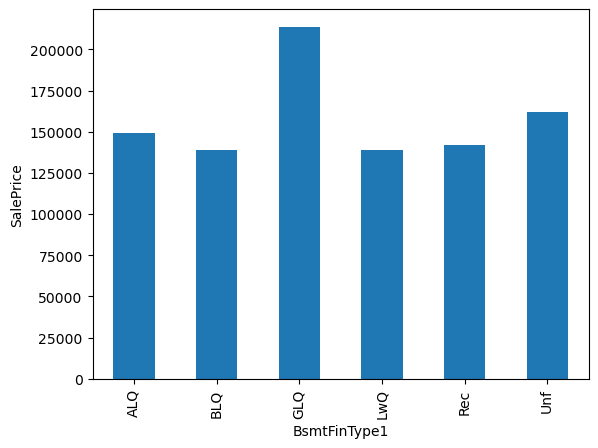

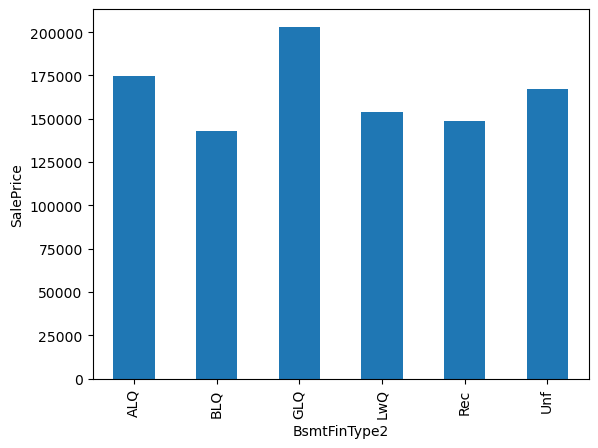

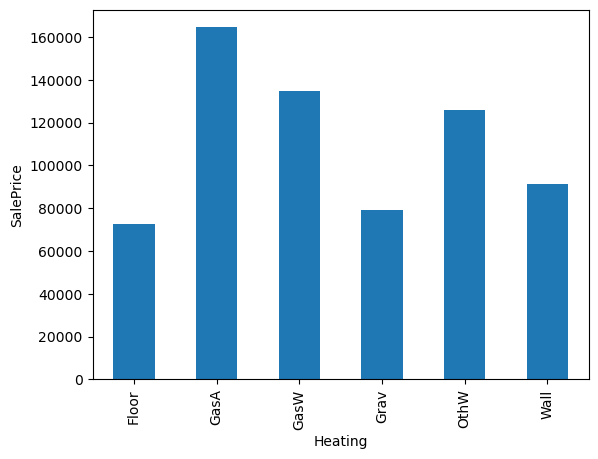

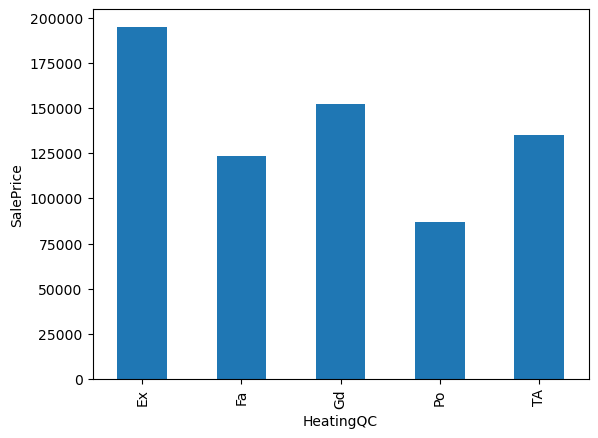

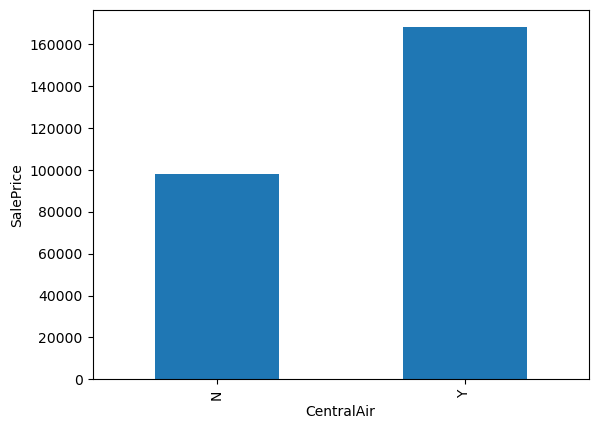

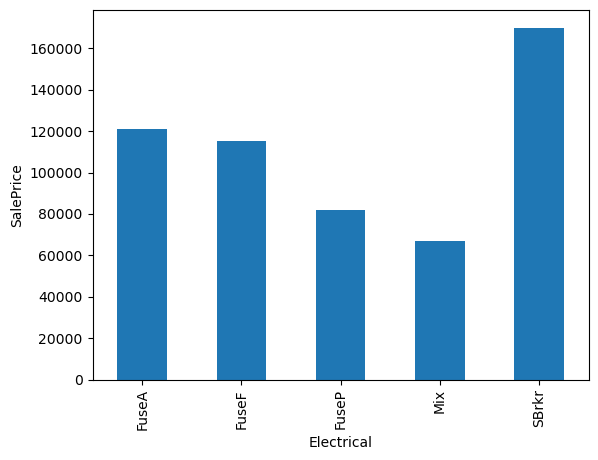

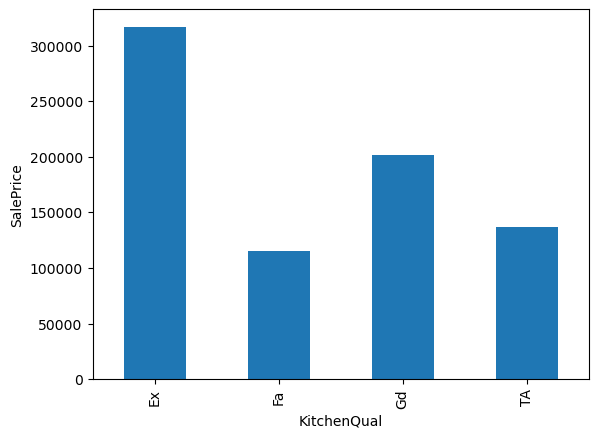

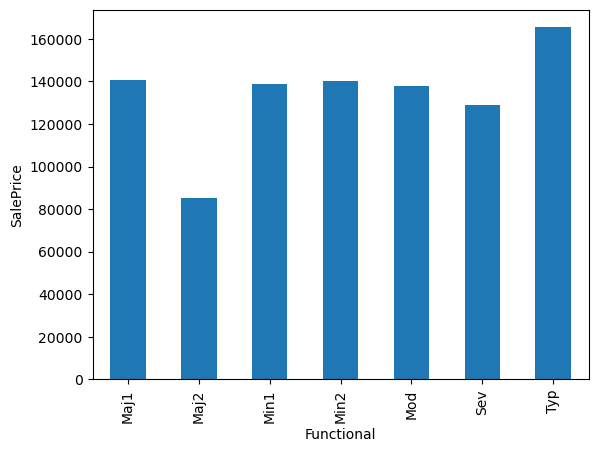

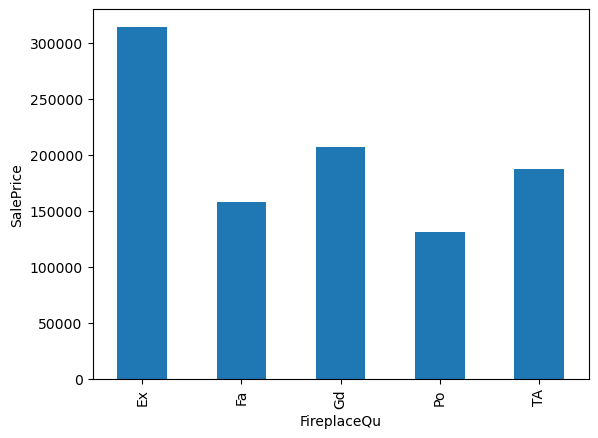

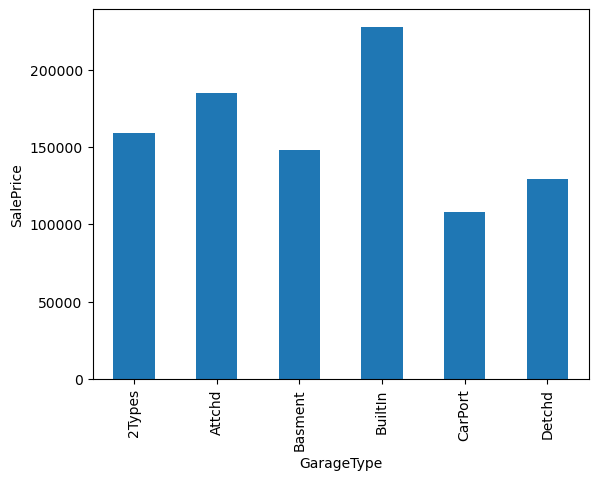

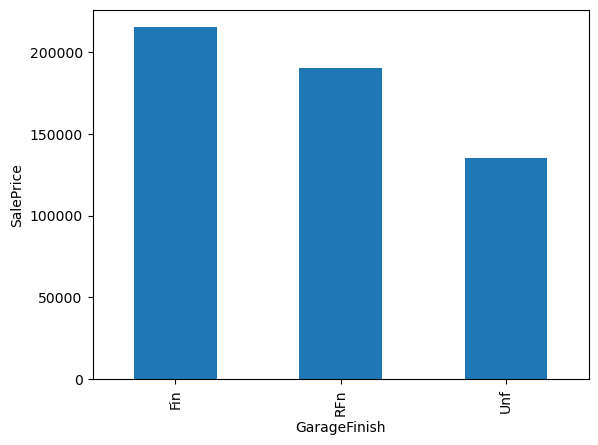

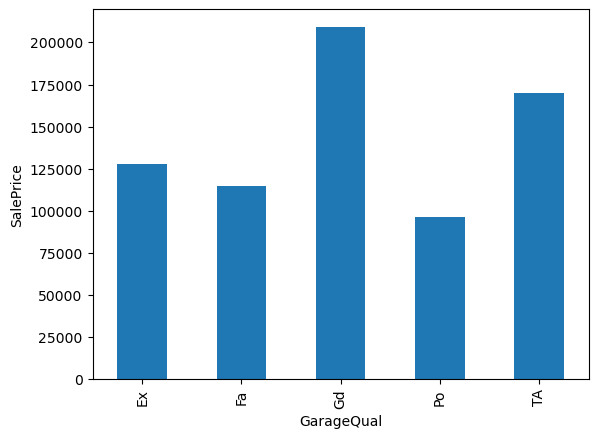

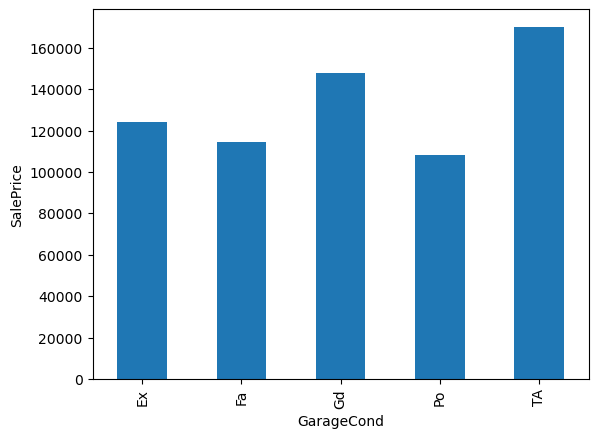

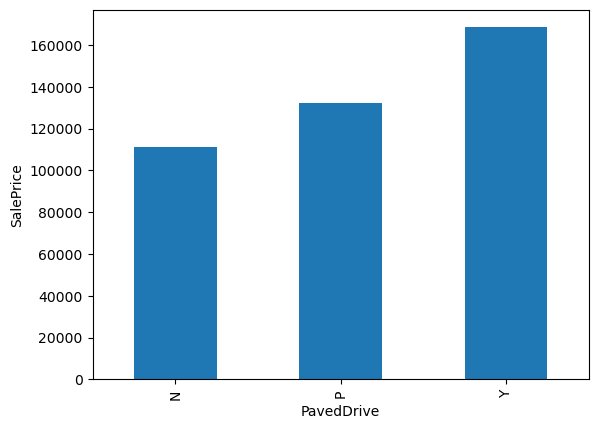

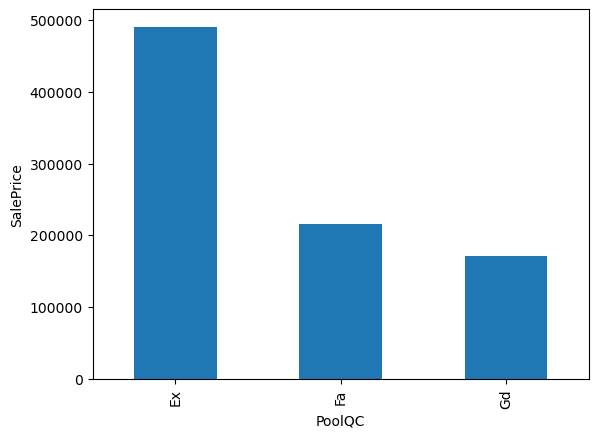

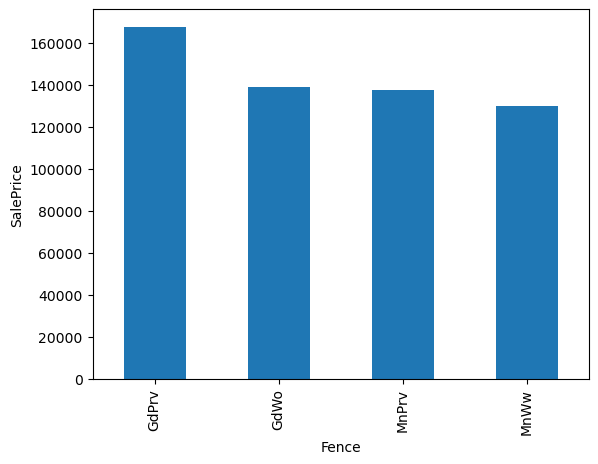

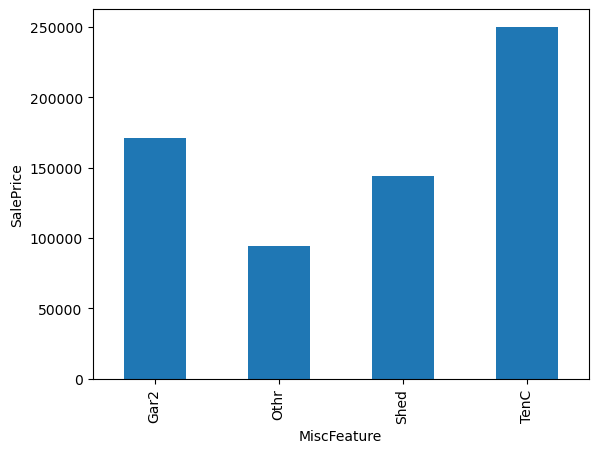

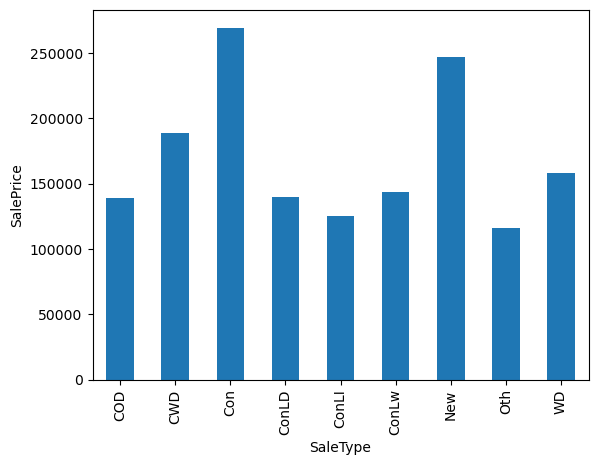

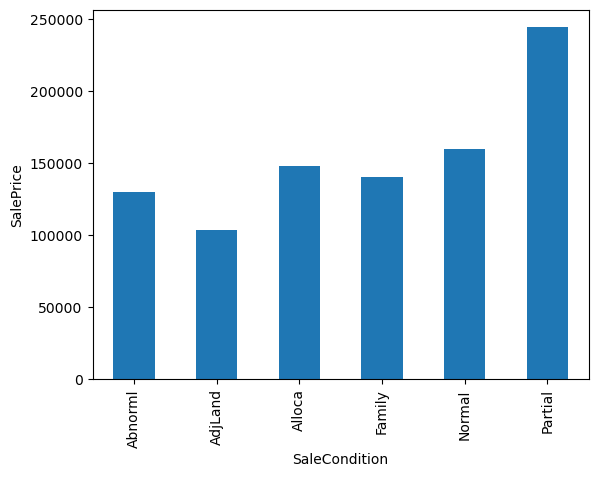

In [37]:
## find the relationship between categorical feature and saleprice
data = dataset.copy()
for feature in categorical_features:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()